In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
           header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
data[:3]

,mpg,cyl,displ,hp,weight,accel,model,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""


In [3]:
cardata=np.array(data[["cyl","mpg","accel"]])
cardata[:3]

array([[ 8. , 18. , 12. ],
       [ 8. , 15. , 11.5],
       [ 8. , 18. , 11. ]])

In [4]:
cars=np.array([line for line in cardata if line[0] in [4,6,8]])

In [5]:
len(cars),len(cardata)

(385, 392)

Define classes: 0, 1, 2 = 4, 6, 8 cylinder
Define features: X[0]=weight; X[1]=accel

In [6]:
Y=cars[:,0]/2-2

In [7]:
X=cars[:,1:]

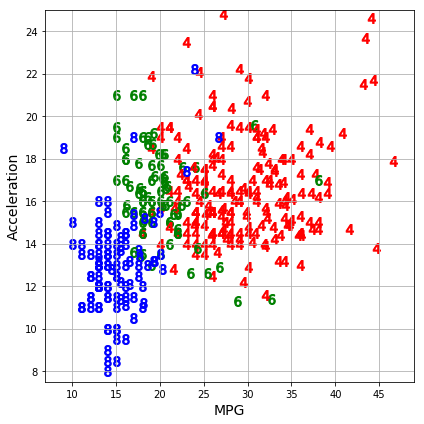

In [8]:
colors=["red", "green","blue"]
clist=[colors[int(j)] for j in Y]
markers=["$4$","$6$","$8$"]
mlist=[markers[int(j)] for j in Y]

mpg=X[:,0]
accel=X[:,1]
#plt.scatter(weight,accel,marker=mlist)
for (w,a,m,c) in zip(mpg, accel, mlist,clist):
    plt.scatter(w,a,marker=m,color=c,s=100)
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.xlabel("MPG",fontsize=14)
plt.ylabel("Acceleration",fontsize=14)
plt.ylim([7.5,25])
plt.grid()
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(6,6)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [10]:
KNN=KNeighborsClassifier(n_neighbors=4)

In [11]:
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=.25)

In [12]:
KNN.fit(XTRAIN, YTRAIN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [13]:
YP=KNN.predict(XTEST)
print(confusion_matrix(YTEST,YP))
print("accuracy = ",accuracy_score(YTEST,YP))

[[50  3  0]
 [ 7 12  0]
 [ 0  6 19]]
accuracy =  0.8350515463917526


In [14]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .25),
                     np.arange(y_min, y_max, .25))

In [15]:
Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

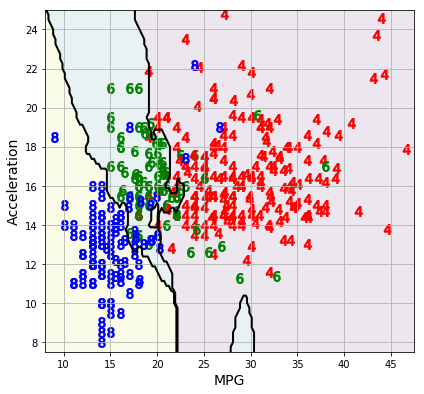

In [16]:
c=plt.contour(xx, yy, Z, alpha=1,levels=[.5, 1.5],linewidths=2,colors="k")
c=plt.contourf(xx, yy, Z, alpha=.1)#,levels=[.5, 1.5])

colors=["red", "green","blue"]
clist=[colors[int(j)] for j in Y]
markers=["$4$","$6$","$8$"]
mlist=[markers[int(j)] for j in Y]
for (w,a,m,c) in zip(mpg, accel, mlist,clist):
    plt.scatter(w,a,marker=m,color=c,s=100)

plt.xlabel("MPG",fontsize=14)
plt.ylabel("Acceleration",fontsize=14)
plt.ylim([7.5,25])
plt.grid()
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(6,6)
#fig.savefig("knn-decision-boundary-mpg-accel-cylinders.pdf")

In [17]:
errs=[]
splits=25
for neighbors in range(1,16):
    KNN = KNeighborsClassifier(n_neighbors=neighbors)
    errors=[]
    for split in range(splits):
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=.25)
        KNN.fit(XTRAIN, YTRAIN)
        YP=KNN.predict(XTEST)
        err=1-accuracy_score(YTEST,YP)
        errors.append(err)
    errs.append(errors)
#plt.scatter(range(2,16),errs)
means=np.mean(errs,axis=1)
sigmas=np.std(errs,axis=1,ddof=1)

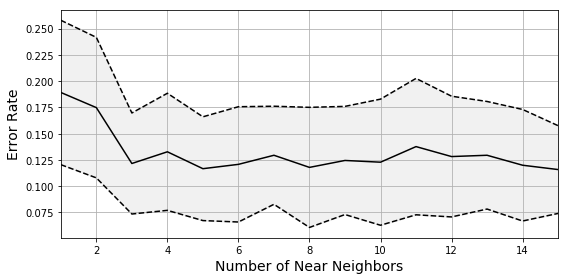

In [18]:
xvals=range(1,16)
plt.plot(xvals,means,c="k")
plt.plot(xvals,means+1.96*sigmas,c="k",ls="--")
plt.plot(xvals,means-1.96*sigmas,c="k",ls="--")
plt.fill_between(xvals, means+1.96*sigmas,means-1.96*sigmas,color="lightgray",alpha=.3)
plt.grid()
plt.xlabel("Number of Near Neighbors",fontsize=14)
plt.ylabel("Error Rate",fontsize=14)
plt.xlim([1,15]);
fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
#fig.savefig("KNN-error-rate-vs-number-of-neighbors.pdf")

In [19]:
def visualize_classifier_contours(ax,clf,X,Y,DX,DY,thelevels,colors):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, DX),
                     np.arange(y_min, y_max, DY))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    c=ax.contour(xx, yy, Z, alpha=1,levels=thelevels,linewidths=2,colors="k")
    c=ax.contourf(xx, yy, Z, alpha=.1)

    
    nclass=len(colors)
    for j in range(nclass):
        col=colors[j]

        xyvals=X[Y==j]
        if len(xyvals)>0:
            x,y=zip(*xyvals)
            ax.scatter(x,y,marker=".",color=col)
    
    return(ax)
    

markers=["$4$","$6$","$8$"]




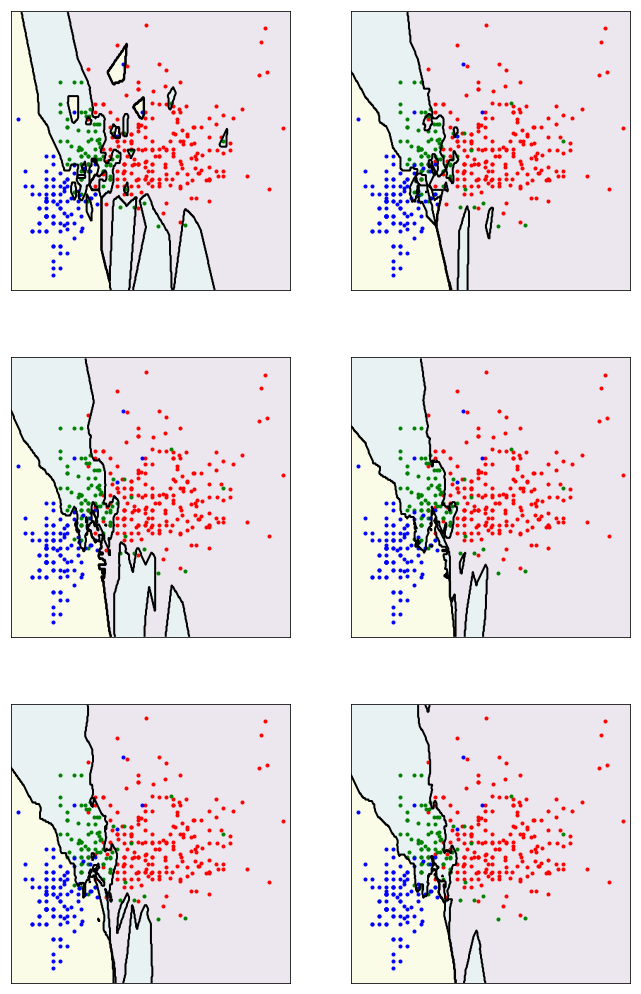

In [20]:
colors=["red", "green","blue"]
fig,ax=plt.subplots(nrows=3,ncols=2,sharex=True,sharey=True)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
DY=y_max-y_min
DX=x_max-x_min
for row in range(3):
    for col in range(2):
        nn=2*row+col+1
        KNN = KNeighborsClassifier(n_neighbors=nn)
        KNN.fit(X,Y)

        ax[row,col]=visualize_classifier_contours(ax[row,col],KNN,X,Y,.1,.1, [0.5,1.5],
                                      colors,)
        ax[row,col].set_title=str(nn)+" Neighbors"
        ax[row,col].set_yticks([])
        ax[row,col].set_xticks([])
        ax[row,col].set_xlim([x_min,x_max])
        ax[row,col].set_ylim([y_min,y_max])
        ax[row,col].set_aspect(DX/DY)
fig.tight_layout()
fig.set_size_inches(12,15)

# KNN on Gaussian Clouds

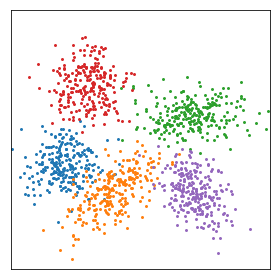

In [32]:
import random
nclouds=5
A=[[[.5,0],[0,.5]], 
   [[.75,.5],[.5,.75]], 
   [[1,0],[0,.25]], 
   [[.5,0],[0,.5]], 
   [[.5,-.2],[-.2,.5]]]

centers=np.array([[2,4],[4,3],[7,6],[3,7],[7,3]])
xcenters=centers.T[0]
ycenters=centers.T[1]
xx=[]; yy=[]
YCLOUD=[]
cloudsize=250
for j in range(nclouds):
    center=[xcenters[j],ycenters[j]]
    xy=np.random.multivariate_normal(center,A[j],cloudsize)
    x,y=zip(*xy)
    plt.scatter(x,y,marker=".", s=15)
    xx=xx+list(x); yy=yy+list(y)
    YCLOUD=YCLOUD+cloudsize*[j]
XCLOUD=np.array([xx,yy]).T
YCLOUD=np.array(YCLOUD)

plt.xlim([0,10])
plt.ylim([0,10])
plt.xticks([]); plt.yticks([])
fig=plt.gcf()
fig.set_size_inches(4,4)
fig.tight_layout()

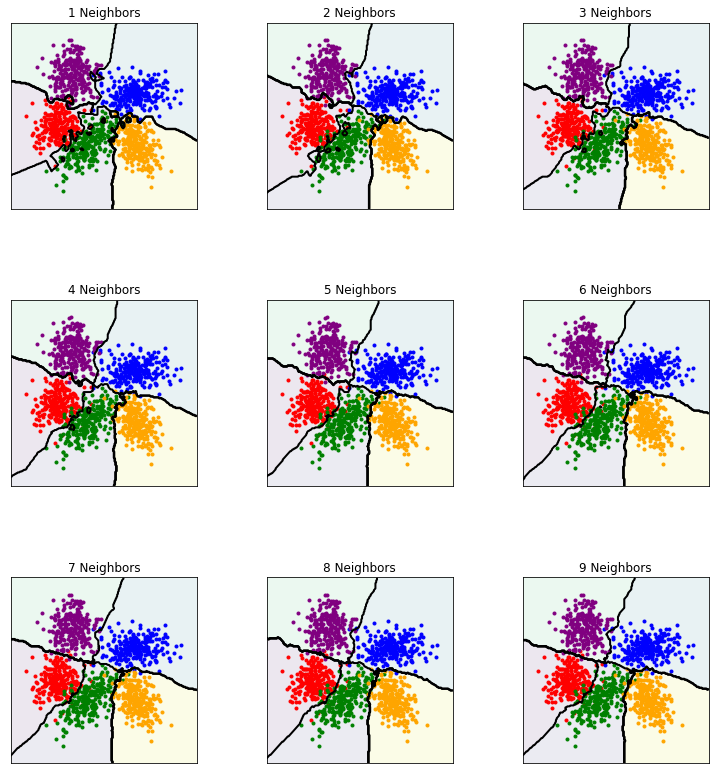

In [33]:

colors=["red", "green","blue","purple","orange"]
fig,ax=plt.subplots(nrows=3,ncols=3,sharex=True,sharey=True)
x_min, x_max = XCLOUD[:, 0].min() - 1, XCLOUD[:, 0].max() + 1
y_min, y_max = XCLOUD[:, 1].min() - 1, XCLOUD[:, 1].max() + 1
DY=y_max-y_min
DX=x_max-x_min
plt.subplots_adjust(wspace=0.01, hspace=0.01, left=.01,bottom=.01)#,right=.99,top=.99)

for row in range(3):
    for col in range(3):
        nn=3*row+col+1

        KNN = KNeighborsClassifier(n_neighbors=nn)
        KNN.fit(XCLOUD,YCLOUD)

        visualize_classifier_contours(ax[row,col],KNN,XCLOUD,YCLOUD,.05,.05, [0.5,1.5,2.5,3.5],colors)
        ax[row][col].set_title(str(nn)+" Neighbors")
        ax[row,col].set_yticks([])
        ax[row,col].set_xticks([])
        #ax[row,col].set_xticklabels([])
        #ax[row,col].set_xlabel()
        ax[row,col].set_xlim([x_min,x_max])
        ax[row,col].set_ylim([y_min,y_max])
        ax[row,col].set_aspect(DX/DY)
fig.tight_layout()
fig.set_size_inches(12,12)

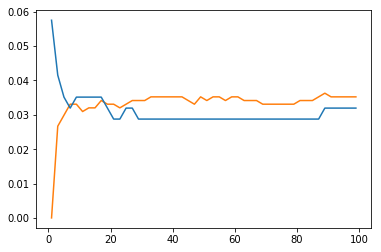

In [62]:
nsplits=1
errors=[]
terrors=[]
for j in range(nsplits):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(XCLOUD,YCLOUD,test_size=.25)
    nn=range(1,100,2)
    errs=[]
    terrs=[]
    for j in nn:
        KNN = KNeighborsClassifier(n_neighbors=j)
        KNN.fit(XTRAIN,YTRAIN)
        YPREDICT=KNN.predict(XTEST)
        acc=accuracy_score(YTEST,YPREDICT)
        err=1-acc
        errs.append(err)
        
        YP=KNN.predict(XTRAIN)
        tacc=accuracy_score(YTRAIN,YP)
        terr=1-tacc
        terrs.append(terr)
    errors.append(errs)
    terrors.append(terrs)
means=np.mean(errors,axis=0)
std=np.std(errors,axis=0)

tmeans=np.mean(terrors,axis=0)
tstd=np.std(terrors,axis=0)
#plt.scatter(nn,means)
plt.errorbar(nn,means,yerr=std)
plt.plot(nn,tmeans)

In [59]:
len(XTEST)

313

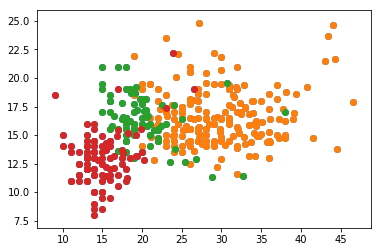

In [41]:
xp,yp=zip(*X)
plt.scatter(xp,yp)
for j in range(3):
    x,y=zip(*X[Y==j])
    plt.scatter(x,y)
    

In [48]:
nsplits=10
errors=[]
for j in range(nsplits):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=.25)
    nn=range(1,100,2)
    errs=[]
    for j in nn:
        KNN = KNeighborsClassifier(n_neighbors=j)
        KNN.fit(XTRAIN,YTRAIN)
        YPREDICT=KNN.predict(XTEST)
        acc=accuracy_score(YTEST,YPREDICT)
        err=1-acc
        errs.append(err)
    errors.append(errs)
#plt.plot(nn,errs)

In [49]:
len(errors)

10

In [53]:
means=np.mean(errors,axis=0)
std=np.std(errors,axis=0)

<ErrorbarContainer object of 3 artists>

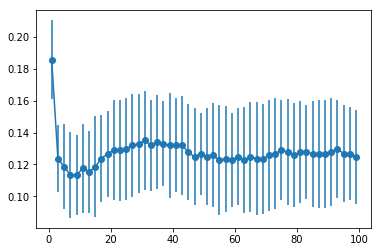

In [56]:
plt.scatter(nn,means)
plt.errorbar(nn,means,yerr=std)